# 7. Bayesian Network (베이즈 네트워크)

<div style="text-align: right"> 2020.02.12 (수) | 염정운 </div>

**Objectives**
* <u>Know and memorize the theorems of probability</u>
    * Recover the probability concepts
    * Recover the probability theorems
    * Recover the concepts of the margina and the conditional independencies
<br><br>
* <u>Understand Bayesian networks</u>
    * Know the syntax and the semantics of Bayesian networks
    * Know how to factorize Bayesian networks
    * Able to calculate a probability with given conditions
<br><br>
* <u>Understand the inference of Bayesian networks</u>
    * Able to calculate parameters of Bayesian networks
    * Able to list the exact inference of Bayesian networks

--------

## 7.1 Recap on probabilities

지금까지 배웠던 확률 개념에 대해 짚고 넘어갑니다.

### 7.1.1 Basic Concepts::

**1. Probability** <br>
Relative frequency with which an outcome would be objatined if the process were **repeated a large number of times under similar conditions**

**2. Conditional Probability**:: $P(H=True|F=True)$ <br>
Read as "Probability of $H$ conditioned on $F$" or "Probability of $H$ given $F$" 
<div>
<img src= attachment:image.png width="500"/>
</div>
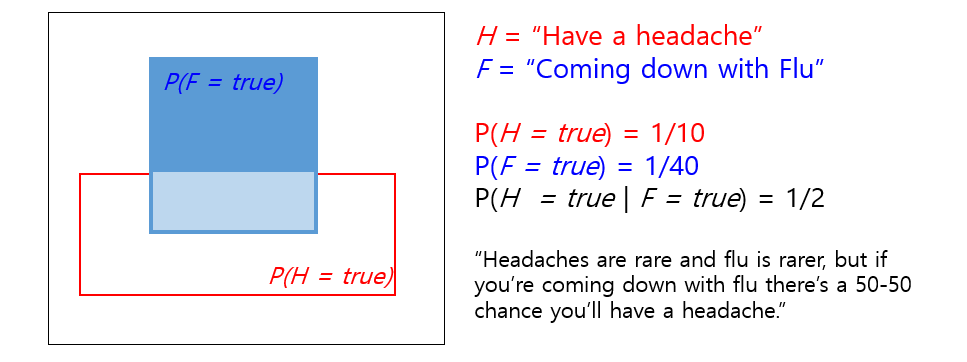

**3. Joint Probability**:: $P(H=True, F=True) = P(H∩F)$ <br>
Read as "Probability of $H$ conditioned on $F$" or "Probability of $H$ given $F$"
<div>
<img src = attachment:image.png width = "500"/>
</div>

* Conditional Probability와 Joint Probability의 관계: $P(H|F) = \frac{P(H,F)}{P(F)}$
* $P(H,F) = P(H)P(F)$ or $P(H|F) = P(H)$일 때, A-B는 **Independence**하다  
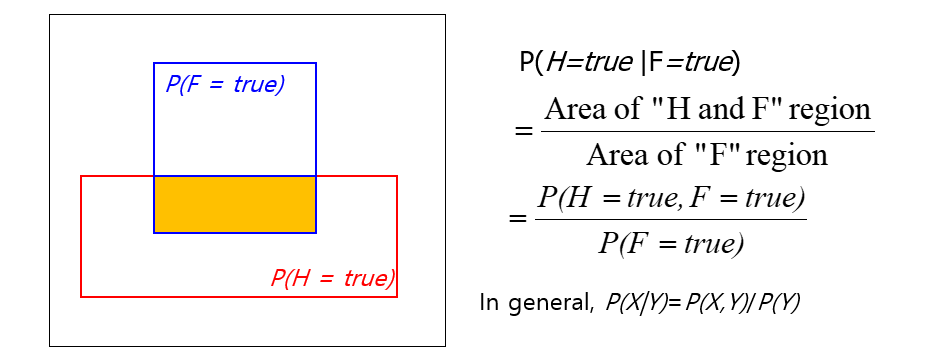

### 7.1.2 Computing with Probabilities::

#### **Marginalization (aka summing out, Law of Total Probability)**<br><br>
$$P(a) = \sum_{b} P(a, b) = \sum_{b} P(a|b) P(b)$$<br>
Joint Distribution이 주어진 경우 이 Marginalization을 이용해 Conditional Probability를 표현해 낼 수도 있습니다. Joint Distribution은 우리가 알아내고 싶어하는 다양한 개별 정보들을 포함할 수 있기 때문입니다. 이를 응용하면 다음과 같은 표현도 가능해집니다.<br><br>
$$P(c|b) = \sum_{a}\sum_{d} P(a,c,d | b) =  \frac{1}{P(b)}\sum_{a}\sum_{d}P(a,b,c,d)$$

#### **Factorization (Chain Rule)**<br>
$$
P(a,b,c,...,z) =
$$
$$
P(a|b,c,...,z) P(b,c,...,z) =
$$
$$
P(a|b,c,...,z)P(b|c,...,z)P(C|...,z)...P(z)
$$ <br>
Conditional Probability와 Joint Probability의 관계를 이용하면 위와 같이 다수의 Random Variable의 Joint Probability에 대한 표현을 Factorization 할 수 있습니다. 즉, 우리는 하나의 Joint Probability 표현을 곱셈의 형태로 표현할 수 있게 됩니다. 다시 말해, Joint Probability에 대한 Distribution이 있다면 우리는 대부분의 확률 값들을 계산해 낼 수 있게 됩니다.

<u>Joint Probability Distribution Example)</u>

<div> <img src = attachment:image.png width = "300"/> </div>
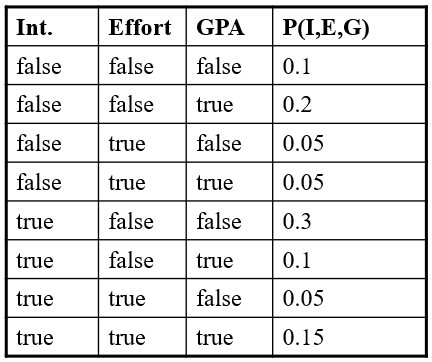

#### **Conditional  Independence**

<div> <img src = attachment:image.png width = '500'/> </div>

우리는 앞서 Independence의 개념에 대해 알아보았습니다. 일반적으로 'A와 B가 Independent하다'라는 것은 Marginal Independence라고 표현합니다. 위의 명령체계 예시에서 만약 Commander로부터 어떠한 명령도 떨어지지 않았다면, Officer A,B는 서로의 움직임을 보면서 자신의 행동을 결정할테니 이 둘은 Marginal Indepence가 아닙니다. <br>

하지만 만약 Commander가 특정한 명령을 내린다면(Condition), Officer는 서로의 움직임에 상관 없이 명령에 맞는 행동을 수행할 것이고, 이때 Officer A,B는 서로 독립 관계가 됩니다. 이처럼 조건이 추가되어 독립 관계가 되는 것을 **Conditional Independence**라고 합니다. 수식으로 표현하면 다음과 같습니다.

> $$ P(A|B,C) = P(A|C)$$ <br> <center> Given $C$, $A$ is conditionally independent of $B$</center> 
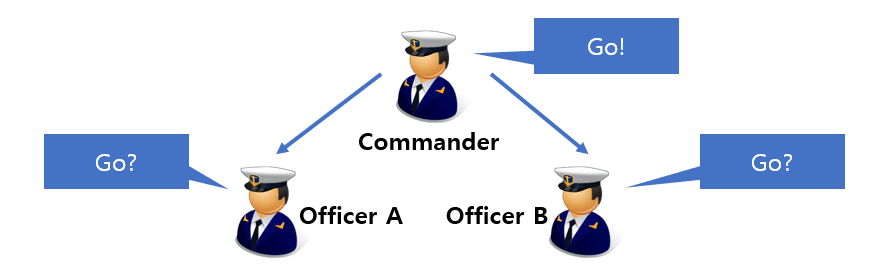

------------

## 7.2 Bayesian Network

### 7.2.1 Bayesian Network
우리는 Chapter3의 Navie Bayes Classifier에서 독립변수 $X_i$들에 대해 서로 given $Y$ 하에서 Conditional independence하다고 Naive 가정한 가정을 했습니다. 이를 통해 효과적으로 계산의 가짓수를 줄였죠

**Naive Bayes Classifier Function**
$$
f_{NB}=\text{argmax}_{Y=y}P(Y=y)\prod_{1\le i\le d}P(X_i=x_i\mid Y=y)
$$

이 때 변수 $Y$와 $X_i$들 간의 관계를 Bayesian Network의 형태로 도식화 하면 다음과 같습니다<br><br>
<div>
<img src = attachment:image.png width = '300'/>
</div>
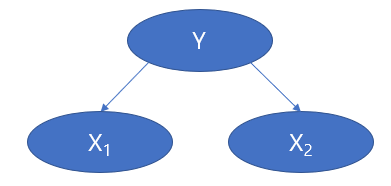

#### Bayesian Network

지금까지 본 것 처럼, Bayesian Network는 Random variable간의 Conditional independence 관계를 시각적으로 도식하며, 서로 간의 full joint distribution을 효과적으로 나타낼 수 있는 표현 방법입니다. 변수 간의 복잡한 dependency 문제를 쉽게 만들기 위한 도구라고 할 수 있겠습니다.<br>

<div> <img src = attachment:image.png width = '300'/> </div> <br>

   * A acyclic and directed graph (순환하지 않으며 일방향적인 graph)
   * Nodes - Random variable / parent and child
   * Links - parent to child
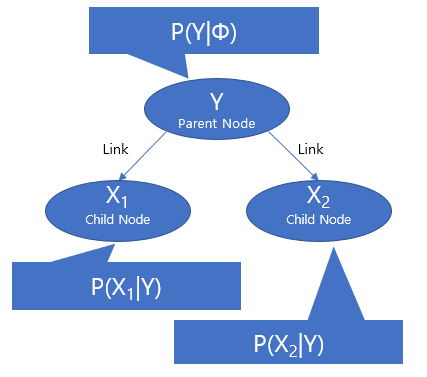

### **7.2.2 Network Example:: Burgular Alarm**
<div> <img src = attachment:image.png width = '700'/></div><br>

* 총 5개의 Random variable이 있습니다. (Burgular, Earthquake, Alarm, John Call, Mary Call) <br>
* Burgular와 Earthquake는 parents가 없는 unconditional한 node이고, 각각 True 일 때의 확률 값이 계산 된 상태입니다.
* 네트워크 구조는 현실을 반영하여 만들어졌습니다.
* 우리는 다음과 같은 정보들을 알고 있습니다.<br>

| 질적 정보   | 양적 정보   |
| ----------- | ----------- |
| Prior knowledge<br>of casual relation      | Conditional probability tables<br> **for each node**  |
| Learning from data   | Probability distribution <br>assignd to nodes        |
| Network Structure   | -        | <br>

Bayesian Network를 이용해 원하는 Probability 값( $P(B|M)$ 등)을 계산해 내기 위해서는 이 질적, 양적 정보 모두를 필요로 합니다.
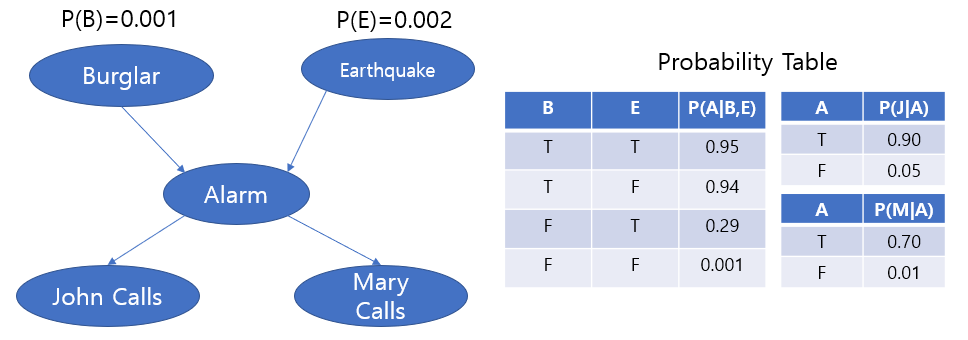

<br><br>

**Typical Local Structures**

위의 예시는 단순한 형태이지만, 실제 현실에서는 훨씬 네트워크 형태가 복잡하겠죠. 이를 좀 더 쉽게 파악하기 위해서는 작은 단위 별로 나눠서 볼 필요가 있습니다. 위의 예시를 구성하고 있는 세부 형태를 정리하면 다음 세 가지 구조를 확인할 수 있습니다.

1. Common parents
<div><img src = attachment:image.png width = '300'/></div>

$$John\:Calls ⊥ Mary\:Calls | Alarm,$$
$$P(J,M|A) = P(J|A)P(M|A)$$

공통의 parent node로 부터 두개의 노드가 뻗어진 상태입니다. 이 때 우리는 **Alarm이라는 변수가 directed 하게 주어진 상태**로, 위와 같은 특징을 가집니다.

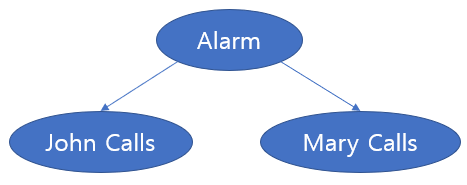

2. Cascading
<div><img src = attachment:image.png width = '400'/></div>

$$Burgular ⊥ Mary\:Calls | Alarm,$$
$$P(M|B,A) = P(M|A)$$

 Cascading은 위와 같은 일자 구조로, Alarm이라는 변수가 주어지면 우리는 MaryCalls라는 변수를 계산할 때 Burgulary를 고려할 필요 없게 되므로, MaryCalls와 Burgulary는 Conditional independence 관계를 가지게 됩니다
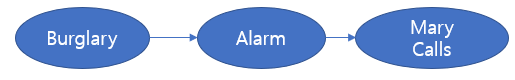

3. V-Structure

<div><img src = attachment:image.png width = '350'/></div>

$$ not(Burgular ⊥ Earthquake)|Alarm,$$
$$P(B,E,A) = P(B)P(E)P(A|B,E)$$

V-structure는 Cascading과 반대로 Alarm이라는 변수가 주어지는 상황이라면 Earthquake와 Burgulary가 독립적이지 않게 됩니다. 만약 Alarm이 발생했는데 Burgulary가 아니라면 당연히 원인은 Earthquake가 될 테니 직관적으로 생각할 수 있습니다.
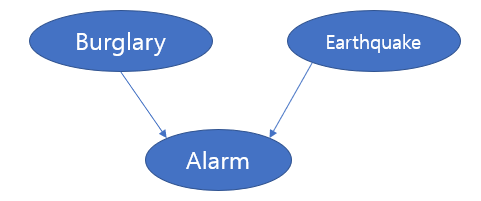

### **7.2.3 Bayes Ball Algorithm**

Bayesian Network의 typical한 구조와 그 때의 conditional independency가 어떻게 발생하는지 확인했습니다. 하지만 이런 구조들이 복잡하게 얽히게 된다면 이러한 조건들과 Independency 여부를 판단하기가 어렵게 되겠죠. 우리는 특정 변수들에 대해 $X_A⊥X_B|X_C$의 성립 여부를 판단할 때 Bayes Ball Algorithm이라는 것을 시각적으로 활용할 수 있습니다.

※Algorithm process※
   1. 모든 Given인 변수의 Node를 색칠한다.
   2. Conditional Independence를 확인하고 싶은 Node 두개를 선택한다.
   3. Graph의 Link를 따라(방향 상관 X) 움직이되, 다음 규칙을 따른다.
       * Common parent, Cascading strucuture라면 색칠 된 Node를 지날 수 없다.
       * V-Structure인 경우 Node가 색칠이 되어있지 않다면 지날 수 없다.
   4. 3번의 과정을 거쳐 시작 노드와 끝 노드가 연결된다면 Independent하지 않다.<br><br>
   
<div><img src = attachment:image.png width = '700'/></div>
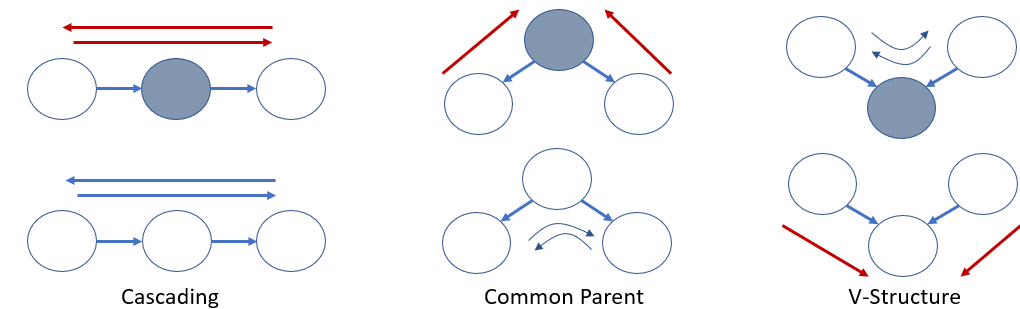

**Example**

<div> <img src = attachment:image.png width = '700'/></div>
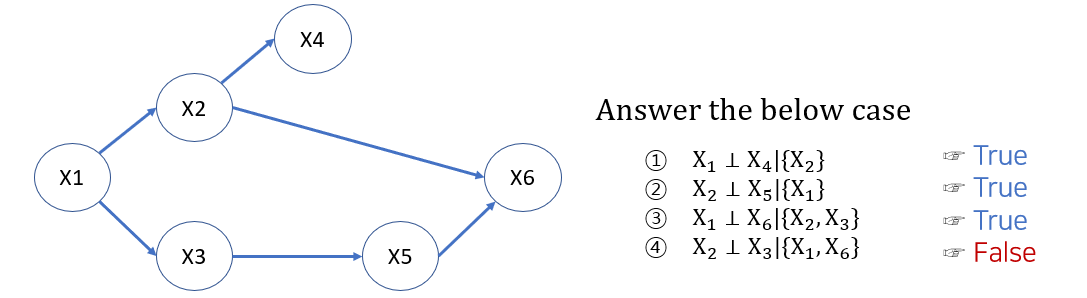

<br><br>

**Markov Blanket & D-Seperation** <br>
V-Structure의 구조를 활용하면 다음과 같은 것들을 정의할 수 있습니다.


1) Markov Blanket<br><br>
특정한 Random variable에 대해 다른 모든 Random variable에게 Conditional Independent 할 수 있는 조건들의 집합

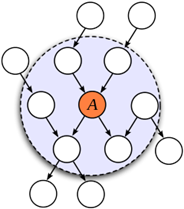

$$ P(A|Blanket, B) = P(A|Blanket),$$ 
$$where\:\:Blanket = \{parents,\: children,\: children's\: other\: parents\}$$ <br><br>

2) D-Seperation

Bayes ball Algorithm을 사용하여 X 노드에서 Z 노드로 볼을 굴릴 수 없는 경우, Y가 주어졌을 때 X가 Z에 directly separeted하다($X⊥Z|Y$)

### **7.2.4 Factorization of Bayesian Network**
이제 지금까지 지겹게 다룬 Conditional Independence가 왜 중요한지 확인 할 차례입니다. 

우리는 Joint Probability를 통해 Conditional, Individual Probability를 도출할 수 있다고 했습니다. 다만, Joint를 있는 그대로 다루기엔 Naive bayes 때도 언급한 것 처럼 parameter 개수가 너무 많아지죠. 잠시 이건 차치하고, 우리는 앞선 Joint Probability와 Conditional Probability 관계를 이용해 다음과 같은 Factorization을 가능하게 했습니다.

$$
P(x_2,x_4,x_5) =
$$
$$
P(x_4|x_2,x_5)P(x_2|x_5)P(x_5)
$$

이 때 Conditional Independence가 전제된다면, 우리는 이걸 좀 더 쉽게 정리할 수 있고, 다시 말해 parameter 개수를 줄일 수 있죠

$$
P(x_4|x_2,x_5)P(x_2|x_5)P(x_5) =
$$
$$
P(x_4|x_2)P(x_2|x_5)P(x_5)
$$

다음의 Bayesian Network를 봅시다.이 Network에 대한 Conditional Probability Table은 적절한 방식(MLE 등)을 통해서 구해진 상태라고 합시다. <br><br>
<div><img src = attachment:image.png width = '300'/></div> <br>

이 때의 Joint Probability는 다음과 같이 표현할 수 있습니다. $X_{πi}$는 $X_i$의 parent node입니다.<br><br>
$$P(X) = P(X_1,X_2,...,X_8) = \prod_{i} P(X_i|X_{πi})=$$
$$P(X_2)P(X_2)P(X_3|X_1)P(X_4|X_2)P(X_5|X_2)P(X_6|X_3,X_4)P(X_7|X_6)P(X_8|X_5,X_6) $$

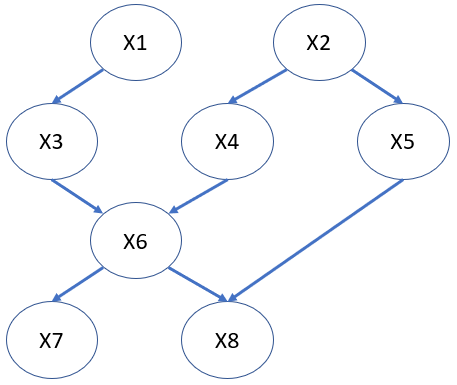

**Plate Notation**
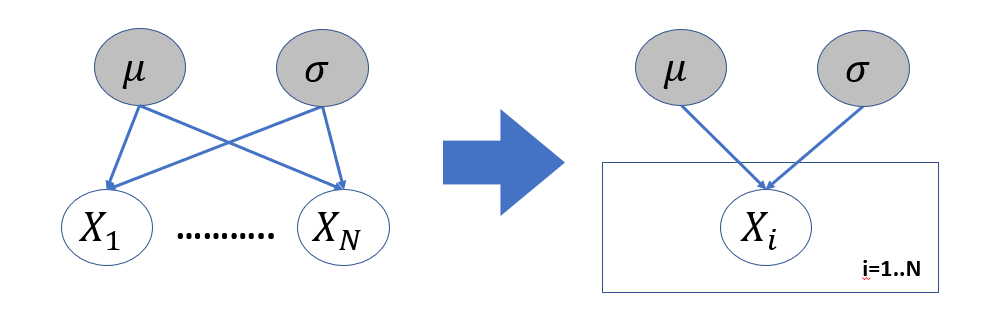

-----------

## 7.3 Inference on Bayesian Networks

### 7.3.1 Inference Questions
이제 본격적으로 Bayesian Network를 이용해서 원하는 확률 값들을 구해볼 차례입니다.

**Inference Question 1: Likelihood** <br><br>
이전 예제에서, $P(Burgular = True, Mary\:Calls = True) = ?$ 의 확률 값을 구하려고 한다고 해봅시다. 우리는 이 때 Random variable들을 다음과 같이 구분하고 식으로 표현할 수 있습니다.<br><br>
- Evidence Variable $X_V = \{X_{k+1},...,X_N\}$ → 우리가 관측했거나 알고자 하는 변수, Event가 이미 발생
- Hidden Variable $X_H = X - X_V = \{X_1,...,X_k\}$ → 알지 못하고 관심 없는 변수, 어떤 Event가 발생했는지 알지 못함



<div><img src = attachment:image.png width='700'/></div> <br>
이 때 우리의 문제 $P(Burgular = True, Mary\:Calls = True)$는 다음과 같이 General하게 표현할 수 있습니다.<br><br>
<center> (1) $P(X_v) = \sum_{X_H}P(X_H,X_V) = \sum_{X_1}...\sum_{X_k}P(X_H,X_V)$ </center>
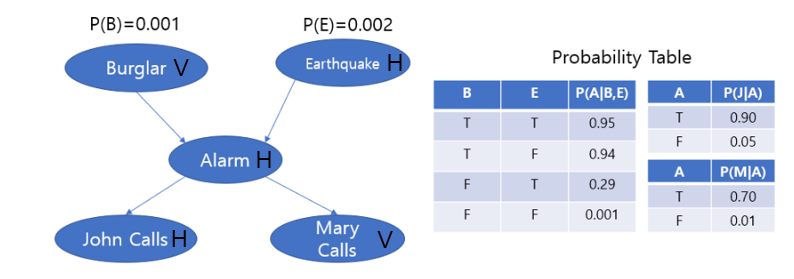

한편, 우리는 위에서 full joint를 factorization 하는 방법을 알아보았죠. Bayesian Network 상에서 full joint인 $P(X_H,X_V)$를 factorize 하면 다음과 같습니다. <br> <br>

<center> (2) $P(X_H,X_V) = P(X) = P(B)P(E)P(A|B,E)P(M|A)P(J|A)$ </center> <br>

이렇게 factorize 된 식은 Probability Table을 이용해서 그 값을 계산할 수 있고, 이를 다시 (1)에 대입해서 계산하면 우리가 원하는 값을 계산해 낼 수 있을 겁니다.

 <br><br>

**Inference Question 2: Conditional Probability** <br><br>
이번에는 $P(Alarm | Burglary = True, Mary\:Calls = True)=?$를 구해 해 봅시다. 이것을 구하기 위해서는 우리가 정의해야 할 것이 하나 더 있습니다. Hidden variable을 다음과 같이 더 자세하게 나눠봅시다.<br>
- $X_H = \{Y,Z\}$
    - $Y$: 관심이 있는 새로운 확률을 구하는데 필요한 Hidden variable
    - $Z$: 필요하지 않은 Hidden variable
    
주어진 문제 $P(Alarm | Burglary = True, Mary\:Calls = True)$를 General 하게 표현하면 다음과 같습니다. <br><br>

<center> (1) $P(Y|x_v)) = \sum_{z}P(Y,Z=z|x_v) = \sum_{z}\frac{P(Y,Z,x_v)}{P(x_v)}= $ </center>
<center> $\sum_{z}\frac{P(Y,Z,x_V)}{\sum_{y,z}P(Y=y,Z=z,x_V)}$ </center> 

우리가 full joint를 알게 된다면 conditional, individual probability를 모두 구할 수 있다고 앞에서 언급했습니다. 우리는 이 점을 이용해서 역으로 full joint를 만들어내려는 방향으로 $Z$의 marginalization을 통해 전개를 했습니다. 그렇게 전개를 하고 보니 분모 항이 우리가 Likelihood 추론을 통해 알 수 있는 값이 나오고, 분자 역시 계산할 수 있습니다.

 <br><br>

**Inference Question 3: Most Probable Assignment** <br>
* $P(A|B,E)$ → $A$ 가 True/False일 때의 Probability
* $P(B,E|A)$ → $B,E$ 각각이 True/False 일 때의 Probability

 <br><br>

### 7.3.2 Variable Elimination
지금까지 우리가 한 Process는 'Full joint 형태로 변환 → Marginalization → Conditioanl Probability 발견' 형태로 정리됩니다. 그렇기 때문에 joint probability는 굉장히 중요한 영역인데, 이 방식은계산의 복잡성이 매우 커지는 문제점을 안고 있기도 합니다. 다음의 전개 예시를 봅시다.

$$P(Alarm = True, Burglar = True, Mary\:Calls = True) \: =\: \sum_{JC}\sum_{E}P(a,b,E,JC,mc) =$$
$$\sum_{JC}\sum_{E}P(JC|a)P(mc|a)P(a|b,E)P(E)P(b)$$

최종적으로 전개된 수식은 매우 복잡하고, 우리는 이제 이 계산을 줄이는 방법을 알아봅니다. Summation기호 밖으로 뺄 수 있는 것들을 최대한 빼 봅시다.

$$\sum_{JC}\sum_{E}P(JC|a)P(mc|a)P(a|b,E)P(E)P(b)=$$
$$P(b)P(mc|a)\sum_{JC}P(JC|a)\sum_{E}P(a|b,E)P(E)$$

이렇게 만들면 계산량을 줄이는 것에 있어서 꽤 효과를 볼 수 있습니다. 이런 일련의 과정들을 좀 더 체계적으로 해봅시다.

**Variable Elimination**

Full joint probability를 전개를 한 뒤 topological order로 정리해보겠습니다.

$$ P(e,jc,mc,B,A)\: =\: αP(e)\sum_{B}P(b)\sum_{A}P(a|b,e)P(jc|a)P(mc|a),$$
$$where\:α=Normalization\:\: Constant$$ <br><br>

그리고, Probability에 대한 표현을 임의의 function의 형태로 notation을 변경한 뒤, Conditional independent한 $f_{JC}(a)$와 $f_{MC}(a)$를 합치도록 하겠습니다.

$$αf_E(e)\sum_{B}f_B(b)\sum_{A}f_A(a,b,e)f_{JC}(a)f_{MC}(a)\: =\: αf_E(e)\sum_{B}f_B(b)\sum_{A}f_A(a,b,e)f_{JC,MC}(a)$$

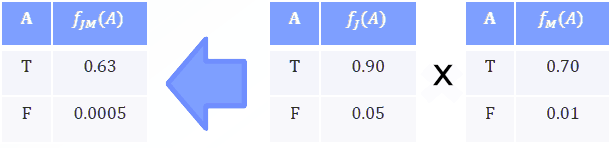

***이런 방식으로 반복해서 업데이트를 진행할 수 있습니다.

$$αf_E(e)\sum_{B}f_B(b)\sum_{A}f_A(a,b,e)f_{JC,MC}(a)\: =\: αf_E(e)\sum_{B}f_B(b)\sum_{A}f_{A,JC,MC}(a,b,e)$$

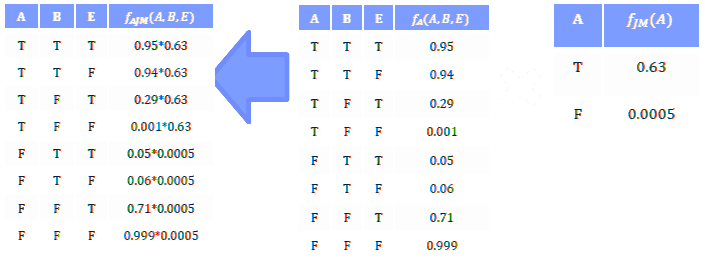

$$αf_E(e)\sum_{B}f_B(b)\sum_{A}f_{A,JC,MC}(a,b,e) = $$
$$αf_E(e)\sum_{B}f_B(b)f_{\bar{A},JC,MC}(b,e) = $$
$$αf_E(e)\sum_{B}f_{B,\bar{A},JC,MC}(b,e) = $$
$$αf_E(e)f_{\bar{B},\bar{A},JC,MC}(e) = $$
$$αf_{E,\bar{B},\bar{A},JC,MC}(e)$$

### 7.3.3 Potential Functions & Absortion
*새로운 관측이 들어왔을 때, 네트워크와 확률 값의 update를 어떻게 진행 할 것인가에 대한 내용?*. 다음 간단한 Bayesian Network 예시를 봅시다.
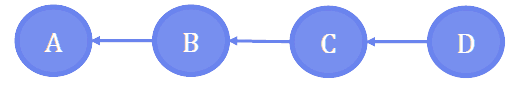

위와 같은 네트워크의 joint probability를 표현하면 위에서 정의했던 대로 다음과 같이 정리될겁니다.
$$ (1)\: P(A,B,C,D) = P(A|B)P(B|C)P(C|D)P(D)$$


***그리고 fully connected 된 관계를 기준으로 우리는 Clique와 Separator의 형태로 아래의 그래프를 그릴 수 있습니다. 그리고 이것을 Clique Graph라고 합니다.

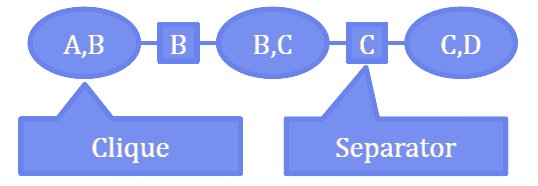

*** 여기서 잠시 Potential Function이라는 것을 한번 정의해 봅시다. Potential function은 PDF 형태로 만들고 싶으나, 아직 조건이 완벽하게 만족되지 않아 섣불리 PDF로 사용할 수 없는, 잠재적인 function입니다. 이러한 Potential Function을 Clique와 Separator에 대해 각각 임의대로 정의한다고 합시다.

- Potential Function on Node(Clique): $ψ(a,b),ψ(b,c), ψ(c,d) $
- Potential Function on link(Separator): $Φ(b),Φ(c)$

그리고 이 정의한 Potential Function을 통해 joint probability $P(A,B,C,D)$를 표현한다고 하면 우리는 다음과 같이 쓸 수 있습니다.

$$(2)\: P(A,B,C,D) = \frac{\prod_{N}ψ(N)}{\prod_{L}Φ(L)} = \frac{ψ(a,b)ψ(b,c)ψ(c,d) }{Φ(b)Φ(c)}$$ 

(1)과 비교해 ψ와 Φ를 적절하게 잡겠다고 가정하면 우리는 ***몇 가지 안을 만들 수 있습니다.

 - 1) $ψ(a,b) = P(A|B),\:\:ψ(b,c) = P(B|C),\:\: ψ(c,d) = P(C|D)P(D),\:\:\:\:Φ(b) = 1,\:\: Φ(c) = 1$
 - 2) $ψ(a,b) = P(A,B),\:\:ψ(b,c) = P(B,C),\:\: ψ(c,d) = P(C,D),\:\:\:\:\:\:\:\:\:\:\:\:Φ(b) = P(B),\:\: Φ(c) = P(C)$

우리가 2안을 선택했다고 가정하면 다음과 같은 표현이 가능해집니다.

- $P(B) = \sum_{A}ψ(A,B)$
- $P(B) = \sum_{C}ψ(B,C)$
- $P(B) = Φ(B)$

그리고, **새로운 관측**에 의해서 $P(A,B)$ →$P(A=1,B)$로 값이 변경된다고 합시다. 그러면 Clique Graph 상에서 Node(C,D) 방향으로 순차적으로 전파(propagation)가 진행되며 update가 될 겁니다. 이를 **Belief propagation**이라고 합니다. Node별 update 과정을 Clique → Separator, Separator → Clique 각각의 case에 대해서 확인해 봅시다.

- Clique → Separator
    - $Φ^*(B) = \sum_{A}ψ^*(A,B)$
    - Q.E.D
<br><br>
- Separator → Clique
    - $ψ^*(B,C) = ψ(B,C)\frac{Φ^*(B)}{Φ(B)}$
    - Proof) 위 공식이 성립한다고 가정 하겠습니다.<br>
    $\sum_{c}ψ^*(B,C) = \sum_{c}ψ(B,C) = \frac{Φ^*(B)}{Φ(B)} =$<br>
    $\frac{Φ^*(B)}{Φ(B)}\sum_{c}ψ(B,C) = \frac{Φ^*(B)}{Φ(B)}Φ(B) = \sum_{A}ψ^*(A,B)$ <br><br>

이런 일련의 propagation의 update 방법을 Absortion Rule이라고 합니다.

### 7.3.4 Simple Example of Belief Propagation


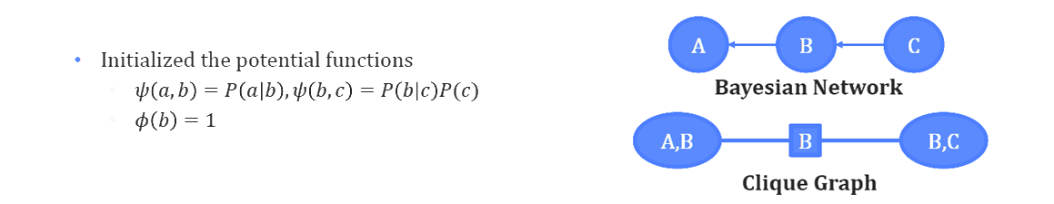

#### Question 1.

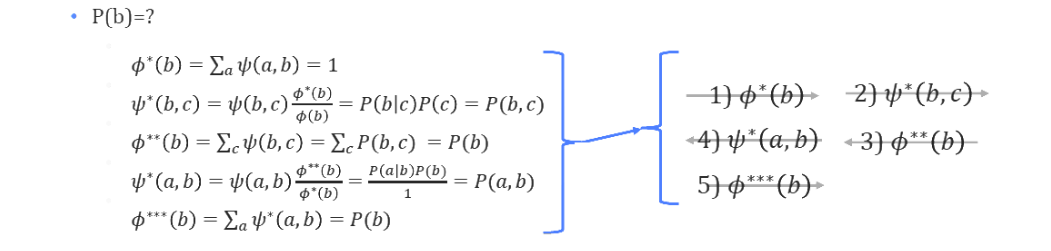

#### Question 2.
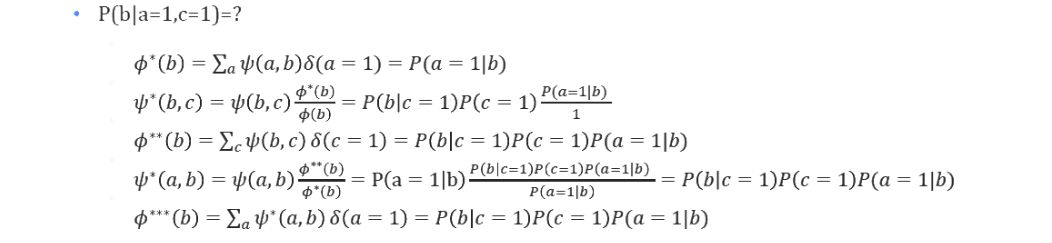